## 💻 Laptop Price Prediction Using Machine Learning
This project aims to predict the prices of laptops based on various technical specifications using regression models. It uses data sourced from Kaggle and applies multiple machine learning techniques including Linear Regression, Random Forest, and Gradient Boosting to identify the relationship between laptop features—such as RAM size, CPU frequency, display type, operating system, and more—and their market prices.

Key Highlights:

📊 The dataset contains detailed attributes of 1,275 laptops with no missing values.

🧠 Categorical features are encoded using label, ordinal, and one-hot encoding for model readiness.

🎯 The performance of models is evaluated using Root Mean Square Error (RMSE).

📉 Exploratory Data Analysis shows trends like the impact of RAM and touchscreen capabilities on pricing.

✅ The final goal is to develop the most accurate model for predicting prices with minimal error.

## 1. Problem definition
To Predict the prices of Laptops based on the features of data provided. This is a Regression Problem

## 2. Data
This data was gotten from Kaggle.com

## 3. Evaluation
The evaluation metric is the RMSE(Root mean square error) between the actual and predicted laptop prices. Our goal is to build a model that minimizes RMSE.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [19]:
# Import the data
df = pd.read_csv("Laptop_prices.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
Company,Apple,Apple,HP,Apple,Apple,Acer,Apple,Apple,Asus,Acer,...,Lenovo,HP,Dell,HP,Asus,Lenovo,Lenovo,Lenovo,HP,Asus
Product,MacBook Pro,Macbook Air,250 G6,MacBook Pro,MacBook Pro,Aspire 3,MacBook Pro,Macbook Air,ZenBook UX430UN,Swift 3,...,IdeaPad Y700-15ISK,Pavilion 15-AW003nv,Inspiron 3567,Stream 11-Y000na,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Yoga 500-14ISK,Yoga 900-13ISK,IdeaPad 100S-14IBR,15-AC110nv (i7-6500U/6GB/1TB/Radeon,X553SA-XX031T (N3050/4GB/500GB/W10)
TypeName,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook,Ultrabook,Ultrabook,...,Notebook,Notebook,Notebook,Netbook,Notebook,2 in 1 Convertible,2 in 1 Convertible,Notebook,Notebook,Notebook
Inches,13.3,13.3,15.6,15.4,13.3,15.6,15.4,13.3,14.0,14.0,...,15.6,15.6,15.6,11.6,15.6,14.0,13.3,14.0,15.6,15.6
Ram,8,8,8,16,8,4,16,8,16,8,...,8,6,8,2,4,4,16,2,6,4
OS,macOS,macOS,No OS,macOS,macOS,Windows 10,Mac OS X,macOS,Windows 10,Windows 10,...,Windows 10,Windows 10,Linux,Windows 10,Windows 10,Windows 10,Windows 10,Windows 10,Windows 10,Windows 10
Weight,1.37,1.34,1.86,1.83,1.37,2.1,2.04,1.34,1.3,1.6,...,2.6,2.04,2.3,1.17,2.2,1.8,1.3,1.5,2.19,2.2
Price_euros,1339.69,898.94,575.0,2537.45,1803.6,400.0,2139.97,1158.7,1495.0,770.0,...,899.0,549.99,805.99,209.0,720.32,638.0,1499.0,229.0,764.0,369.0
Screen,Standard,Standard,Full HD,Standard,Standard,Standard,Standard,Standard,Full HD,Full HD,...,Full HD,Full HD,Standard,Standard,Standard,Full HD,Quad HD+,Standard,Standard,Standard
ScreenW,2560,1440,1920,2880,2560,1366,2880,1440,1920,1920,...,1920,1920,1366,1366,1366,1920,3200,1366,1366,1366


In [19]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Company,Apple,Apple,HP,Apple,Apple,Acer,Apple,Apple,Asus,Acer,HP,HP,Apple,Dell,Apple,Apple,Dell,Apple,Lenovo,Dell
Product,MacBook Pro,Macbook Air,250 G6,MacBook Pro,MacBook Pro,Aspire 3,MacBook Pro,Macbook Air,ZenBook UX430UN,Swift 3,250 G6,250 G6,MacBook Pro,Inspiron 3567,"MacBook 12""",MacBook Pro,Inspiron 3567,MacBook Pro,IdeaPad 320-15IKB,XPS 13
TypeName,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook,Ultrabook,Ultrabook,Notebook,Notebook,Ultrabook,Notebook,Ultrabook,Ultrabook,Notebook,Ultrabook,Notebook,Ultrabook
Inches,13.3,13.3,15.6,15.4,13.3,15.6,15.4,13.3,14.0,14.0,15.6,15.6,15.4,15.6,12.0,13.3,15.6,15.4,15.6,13.3
Ram,8,8,8,16,8,4,16,8,16,8,4,4,16,4,8,8,8,16,8,8
OS,macOS,macOS,No OS,macOS,macOS,Windows 10,Mac OS X,macOS,Windows 10,Windows 10,No OS,No OS,macOS,Windows 10,macOS,macOS,Windows 10,macOS,No OS,Windows 10
Weight,1.37,1.34,1.86,1.83,1.37,2.1,2.04,1.34,1.3,1.6,1.86,1.86,1.83,2.2,0.92,1.37,2.2,1.83,2.2,1.22
Price_euros,1339.69,898.94,575.0,2537.45,1803.6,400.0,2139.97,1158.7,1495.0,770.0,393.9,344.99,2439.97,498.9,1262.4,1518.55,745.0,2858.0,499.0,979.0
Screen,Standard,Standard,Full HD,Standard,Standard,Standard,Standard,Standard,Full HD,Full HD,Standard,Full HD,Standard,Full HD,Standard,Standard,Full HD,Standard,Full HD,Full HD
ScreenW,2560,1440,1920,2880,2560,1366,2880,1440,1920,1920,1366,1920,2880,1920,2304,2560,1920,2880,1920,1920


In [3]:
# check for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [4]:
# Check for missing data
df.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

we have no missing data...... interesting

### EXPLORATORY DATA ANALYSIS

In [3]:
plt.style.use("ggplot")

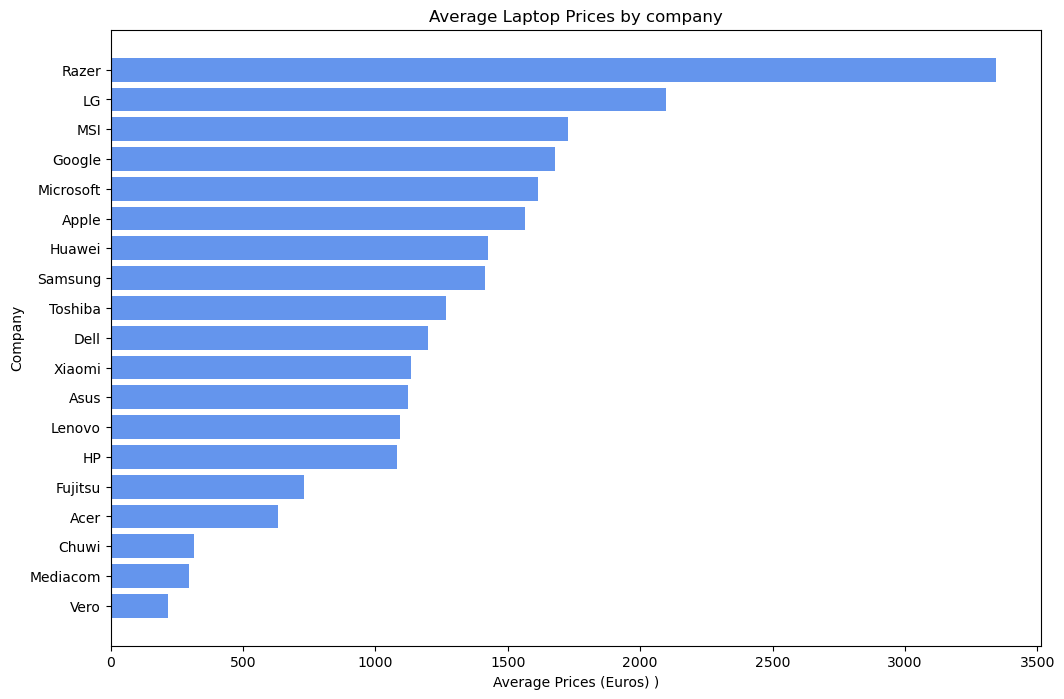

In [6]:
avg_prices_by_company = df.groupby("Company")["Price_euros"].mean().sort_values()
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(avg_prices_by_company.index, avg_prices_by_company.values, color="cornflowerblue");
ax.set(title="Average Laptop Prices by company",
      xlabel="Average Prices (Euros) )",
      ylabel="Company");

 Mean is the not the best measure of central tendency to be used in drawing insight from this data due to the prescence of outliers

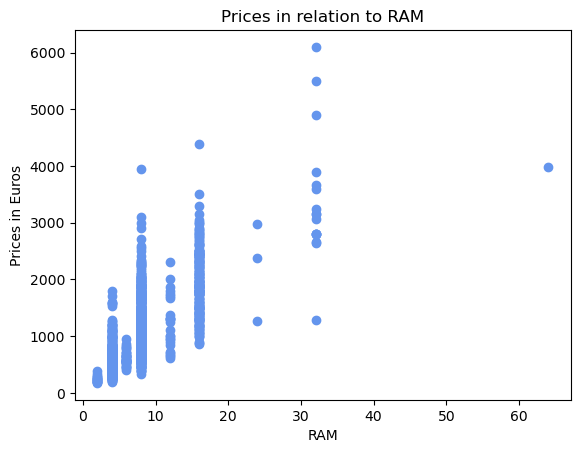

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["Ram"], df["Price_euros"], color="cornflowerblue")
ax.set(title="Prices in relation to RAM",
      xlabel="RAM",
      ylabel="Prices in Euros");

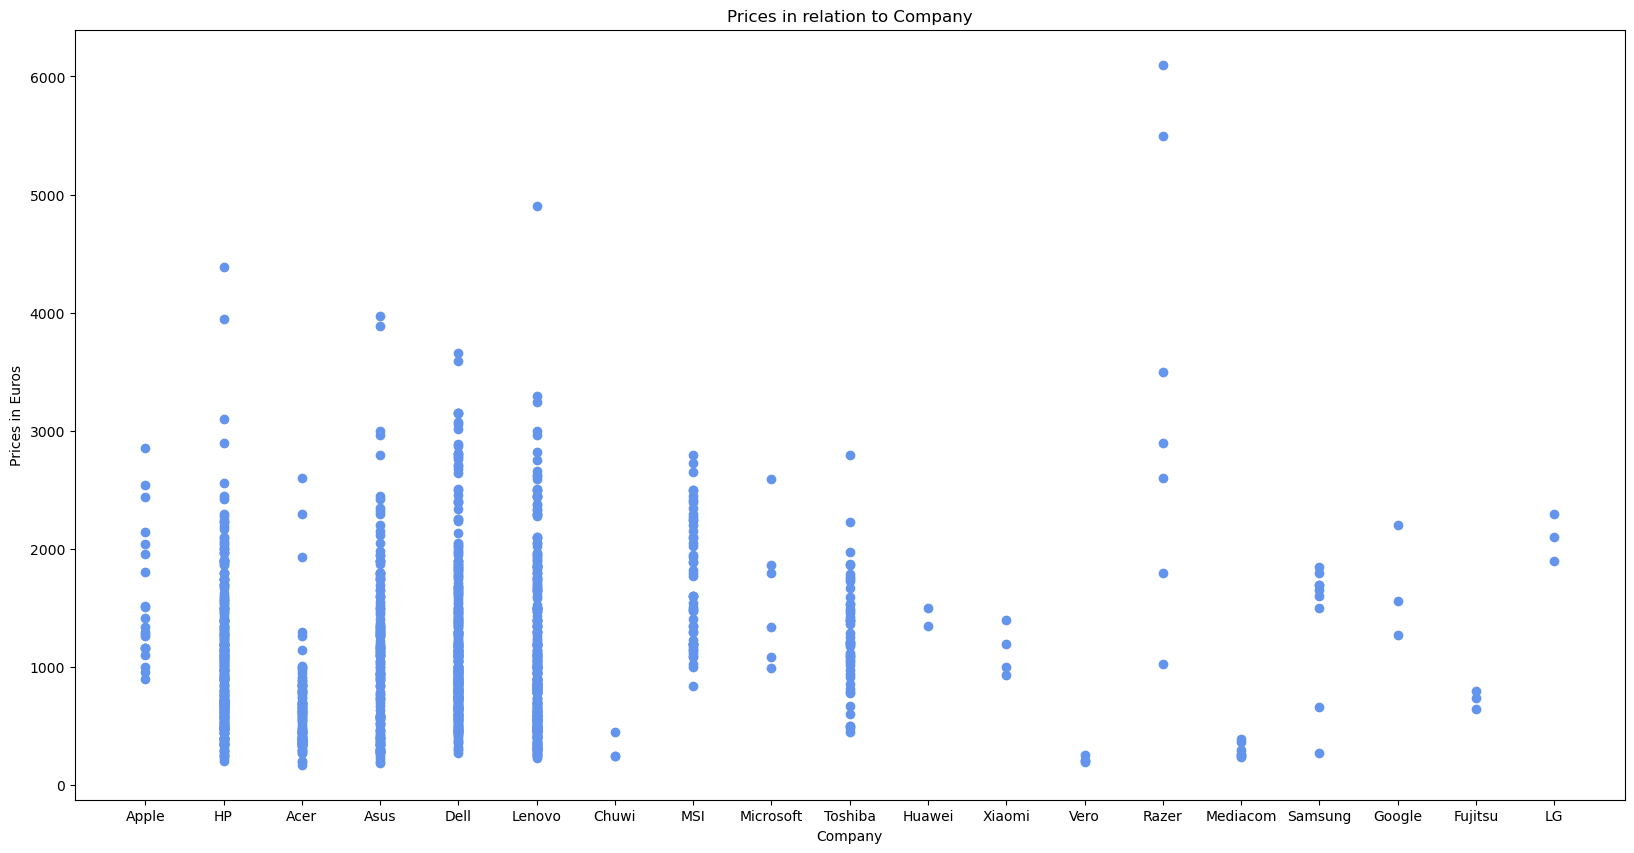

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df["Company"], df["Price_euros"], color="cornflowerblue")
ax.set(title="Prices in relation to Company",
      xlabel="Company",
      ylabel="Prices in Euros");

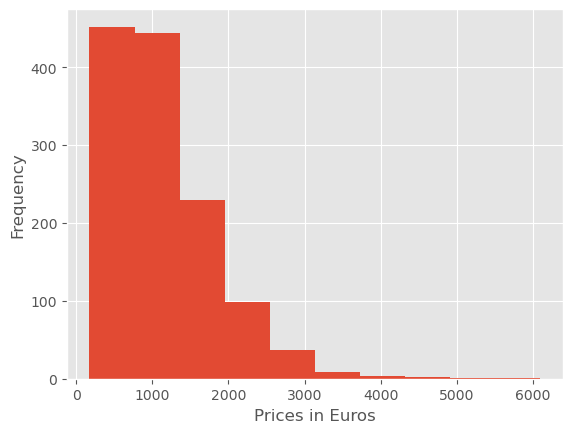

In [8]:
df.Price_euros.plot.hist(xlabel="Prices in Euros");

#### The above Histogram shows that most of the Laptop prices are below 2000 Euros

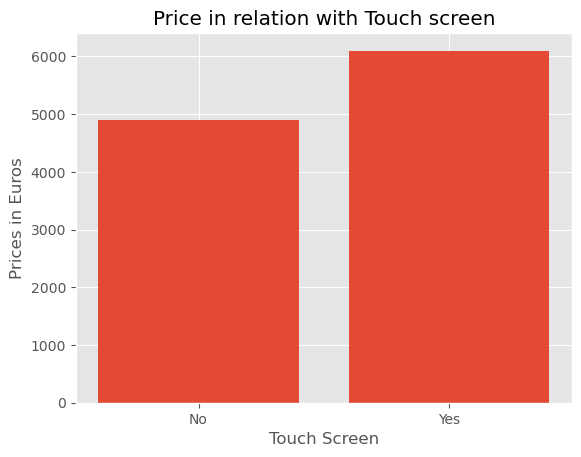

In [18]:
fig, ax = plt.subplots()
ax.bar(df["Touchscreen"], df["Price_euros"]);
ax.set(title="Price in relation with Touch screen",
      xlabel="Touch Screen",
      ylabel="Prices in Euros");

We can infer that touchscreen property of a laptop influences the price of the laptop

In [20]:
df.Company.value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

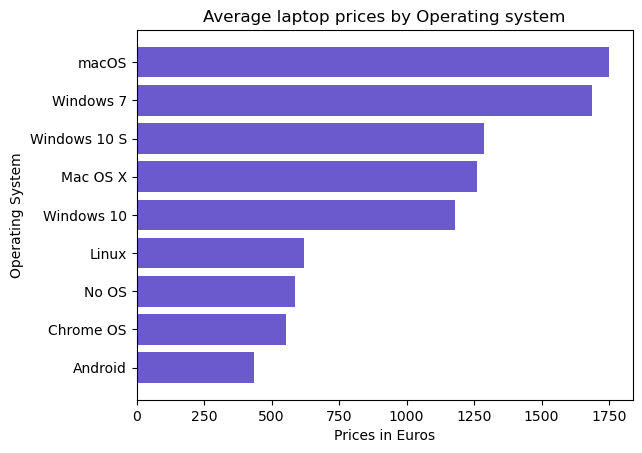

In [12]:
avg_prices_of_OS = df.groupby("OS")["Price_euros"].mean().sort_values()
fig, ax = plt.subplots()
ax.barh(avg_prices_of_OS.index, avg_prices_of_OS.values, color="slateblue")
ax.set(title="Average laptop prices by Operating system",
      xlabel="Prices in Euros",
      ylabel="Operating System");

Drawing insight from the above bar chart, we can see how the feature "Operating system" affect the prices of Laptops

In [37]:
df.OS.value_counts()

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [38]:
df.TypeName.value_counts()

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

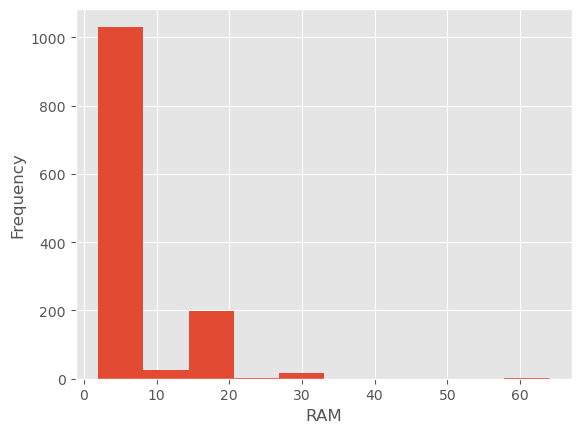

In [13]:
df.Ram.plot.hist(xlabel="RAM");

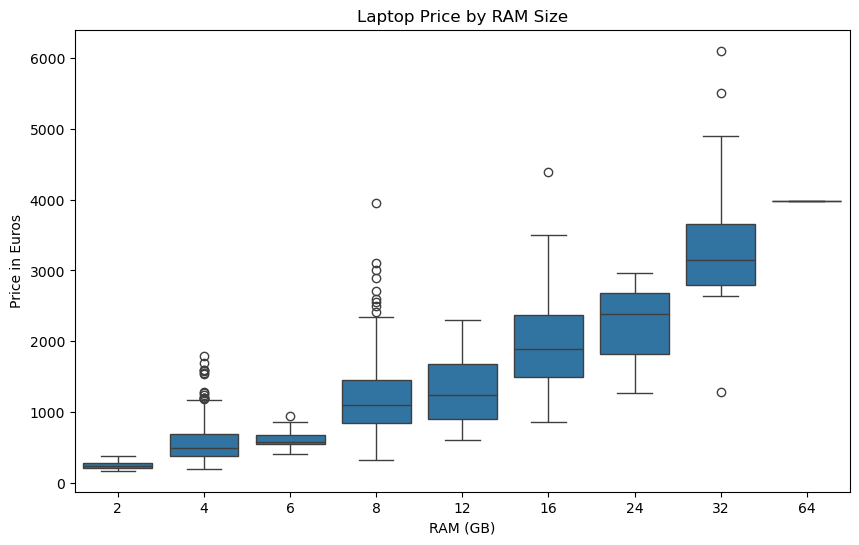

In [4]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title("Laptop Price by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Price in Euros")
plt.show()

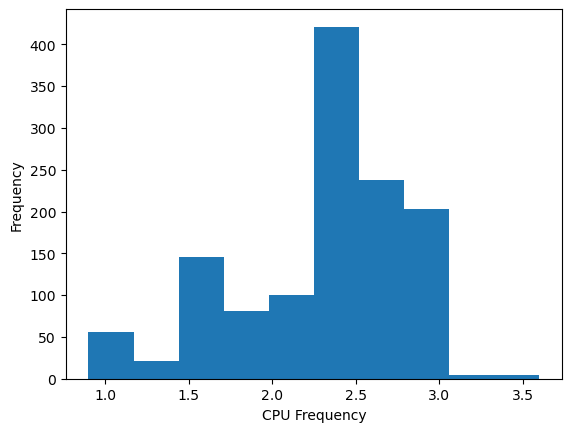

In [13]:
df.CPU_freq.plot.hist(xlabel="CPU Frequency");

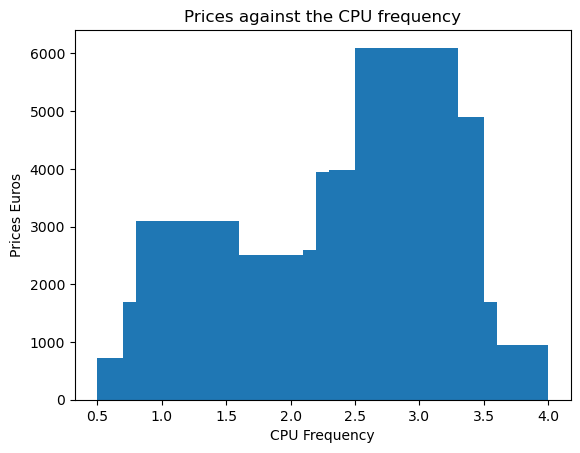

In [8]:
fig, ax=plt.subplots()
ax.bar(df["CPU_freq"], df["Price_euros"])
ax.set(title="Prices against the CPU frequency",
      xlabel="CPU Frequency",
      ylabel="Prices Euros");

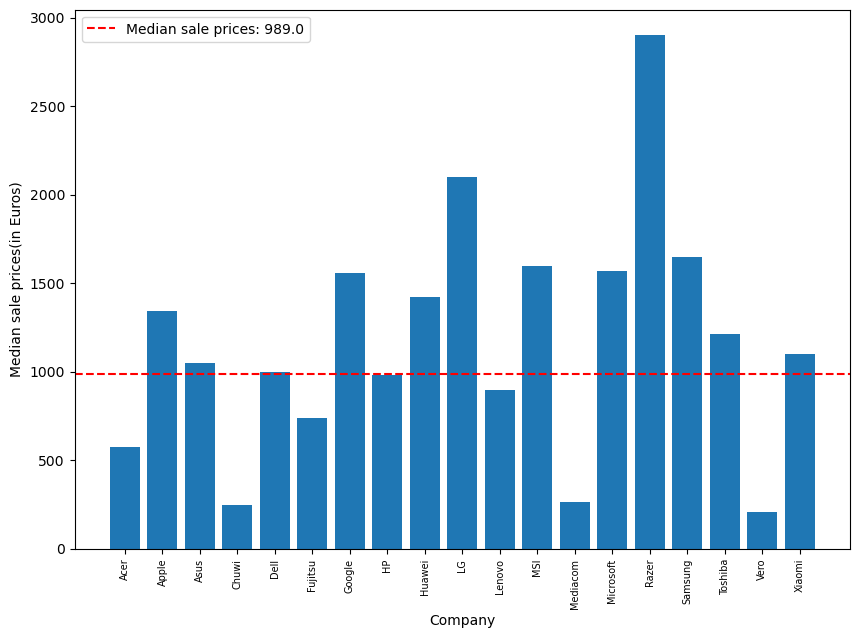

In [9]:
median_prices_by_company = df.groupby(["Company"])["Price_euros"].median()
median_sale_prices = df["Price_euros"].median()

plt.figure(figsize=(10,7))
plt.bar(x=median_prices_by_company.index,
       height=median_prices_by_company.values)
plt.xlabel("Company")
plt.ylabel("Median sale prices(in Euros)")
plt.xticks(fontsize=7, rotation=90)
plt.axhline(y=median_sale_prices,
           color="red",
           linestyle="--",
           label=f"Median sale prices: {median_sale_prices}")
plt.legend()

In [22]:
df["Price_euros"].median()

989.0

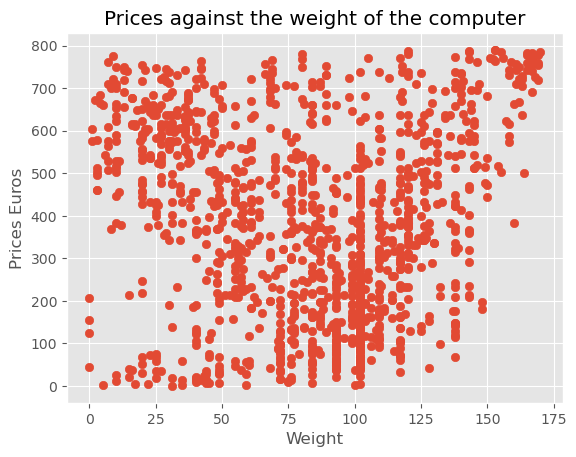

In [10]:
fig, ax=plt.subplots()
ax.scatter(df["Weight"], df["Price_euros"])
ax.set(title="Prices against the weight of the computer",
      xlabel="Weight",
      ylabel="Prices Euros");

In [4]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [28]:
# To know the number of columns with non-numerical feaures
for label, content in df.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        print(label)

Company
Product
TypeName
OS
Screen
CPU_company
CPU_model
PrimaryStorageType
SecondaryStorageType
GPU_company
GPU_model


### Convert the categorical Features to numerical features

In [30]:
# import the necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
df_encoded = df

In [31]:
# Handle binary features(yes/no) with LabelEncoding
binary_features = ["Touchscreen", "IPSpanel", "RetinaDisplay"]
le = LabelEncoder()
for col in binary_features:
    df_encoded[col] = le.fit_transform(df[col])

In [32]:
# Handle TargetEncoding before dropping company
df_encoded["company_encoded"] = df.groupby("Company")["Price_euros"].transform("mean")

In [33]:
df_encoded["Product_encoded"] = df.groupby("Product")["Price_euros"].transform("mean")

In [34]:
# Apply OrdinalEncoding to Ranked features
type_order = [["Netbook", "Notebook", "Ultrabook", "Gaming", "2 in 1 Convertible", "Workstation"]]
oe = OrdinalEncoder(categories=type_order)

# Apply encoding
df_encoded["TypeName"] = oe.fit_transform(df[["TypeName"]])

In [35]:
# Apply one-hot encoding to Multiclass Categoricals
categorical_to_encode = ["Company", "OS", "PrimaryStorageType", "SecondaryStorageType", "GPU_company", "CPU_company", "Screen"]
df_encoded = pd.get_dummies(df, columns=categorical_to_encode)

In [36]:
# Save cleaned data
df_encoded.to_csv("Laptop_prices_encoded.csv", index=False)

In [2]:
df_clean = pd.read_csv("Laptop_prices_encoded.csv")
df_clean.T

,0,1,2,3,4,5,6,7,8,9,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
Product,MacBook Pro,Macbook Air,250 G6,MacBook Pro,MacBook Pro,Aspire 3,MacBook Pro,Macbook Air,ZenBook UX430UN,Swift 3,...,IdeaPad Y700-15ISK,Pavilion 15-AW003nv,Inspiron 3567,Stream 11-Y000na,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Yoga 500-14ISK,Yoga 900-13ISK,IdeaPad 100S-14IBR,15-AC110nv (i7-6500U/6GB/1TB/Radeon,X553SA-XX031T (N3050/4GB/500GB/W10)
TypeName,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,0.0,1.0,4.0,4.0,1.0,1.0,1.0
Inches,13.3,13.3,15.6,15.4,13.3,15.6,15.4,13.3,14.0,14.0,...,15.6,15.6,15.6,11.6,15.6,14.0,13.3,14.0,15.6,15.6
Ram,8,8,8,16,8,4,16,8,16,8,...,8,6,8,2,4,4,16,2,6,4
Weight,1.37,1.34,1.86,1.83,1.37,2.1,2.04,1.34,1.3,1.6,...,2.6,2.04,2.3,1.17,2.2,1.8,1.3,1.5,2.19,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CPU_company_Samsung,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Screen_4K Ultra HD,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Screen_Full HD,False,False,True,False,False,False,False,False,True,True,...,True,True,False,False,False,True,False,False,False,False
Screen_Quad HD+,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [38]:
df_clean.columns

Index(['Product', 'TypeName', 'Inches', 'Ram', 'Weight', 'Price_euros',
       'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
       'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage',
       'GPU_model', 'company_encoded', 'Product_encoded', 'Company_Acer',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'OS_Android',
       'OS_Chrome OS', 'OS_Linux', 'OS_Mac OS X', 'OS_No OS', 'OS_Windows 10',
       'OS_Windows 10 S', 'OS_Windows 7', 'OS_macOS',
       'PrimaryStorageType_Flash Storage', 'PrimaryStorageType_HDD',
       'PrimaryStorageType_Hybrid', 'PrimaryStorageType_SSD',
       'SecondaryStorageType_HDD', 'SecondaryStorageType_Hybrid',
       'SecondarySto

In [3]:
df_clean.drop(["Product", "CPU_model", "GPU_model"], axis=1, inplace=True)

In [41]:
for label, content in df_clean.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        print(label)

### Model Driven Analysis
We would be trying three different models on our project:
* Linear regression *
* Random Forest Regressor *
* XGBoost Regressor *

In [4]:
# Import the 3 models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error 

In [16]:
X = df_clean.drop("Price_euros", axis=1)
Y = df_clean["Price_euros"]

In [7]:
Models = {"Linear Regression": LinearRegression(),
         "RandomForestRegressor": RandomForestRegressor(random_state=42),
         "Gradient Boost Regressor": GradientBoostingRegressor(random_state=42)}

def fit_and_score(models, x, y):
    """A function to fit and score(RMSE) each model"""
    # To ensure reproducibility, use random.seed
    np.random.seed(42)
    # To initialize a dictionary for score storage
    model_scores = {}
    # Loop through each of the three models
    for name, model in models.items():
        # Create a cross-validator and shuffle for fairness
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        # define RMSE SCORER, the lower the score, the better the model
        rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)
        # runs the model for each fold and records the RMSE for each run
        scores = cross_val_score(model, x, y, cv=kf, scoring=rmse_scorer)
        # Store the average score
        model_scores[name] = (abs(np.mean(scores)))
    return model_scores

In [8]:
Model_Score = fit_and_score(Models, X, Y)
Model_Score

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the func

{'Linear Regression': 194.28034329586728,
 'RandomForestRegressor': 199.84611498316184,
 'Gradient Boost Regressor': 183.12205835440352}

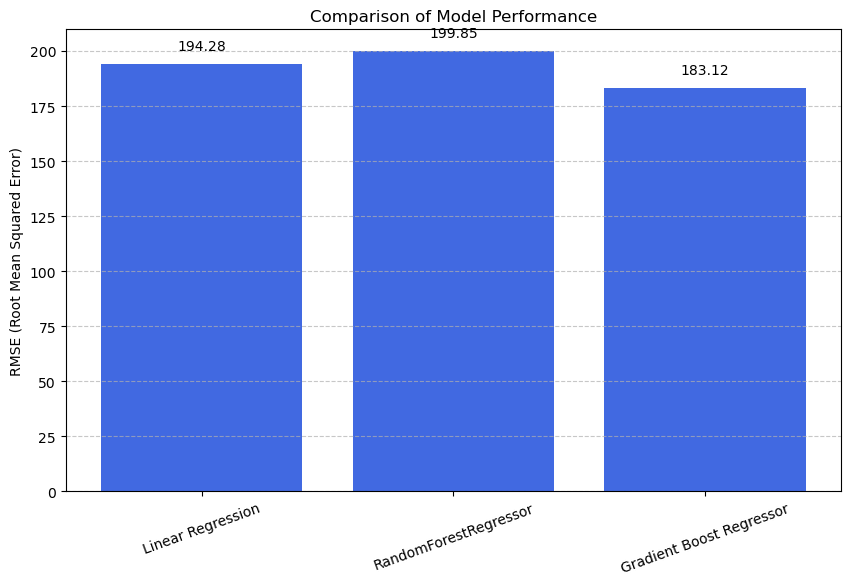

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(Model_Score.keys(), Model_Score.values(), color='royalblue')
plt.ylabel("RMSE (Root Mean Squared Error)")
plt.title("Comparison of Model Performance")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate bars with score
for i, (name, score) in enumerate(Model_Score.items()):
    plt.text(i, score + 5, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

"the lower the score, the better". Therefore, GradientBoostRegressor is the best performing model

### Extract Feature Importance

In [10]:
GBR_model = GradientBoostingRegressor()
GBR_model.fit(X, Y)
importances = GBR_model.feature_importances_

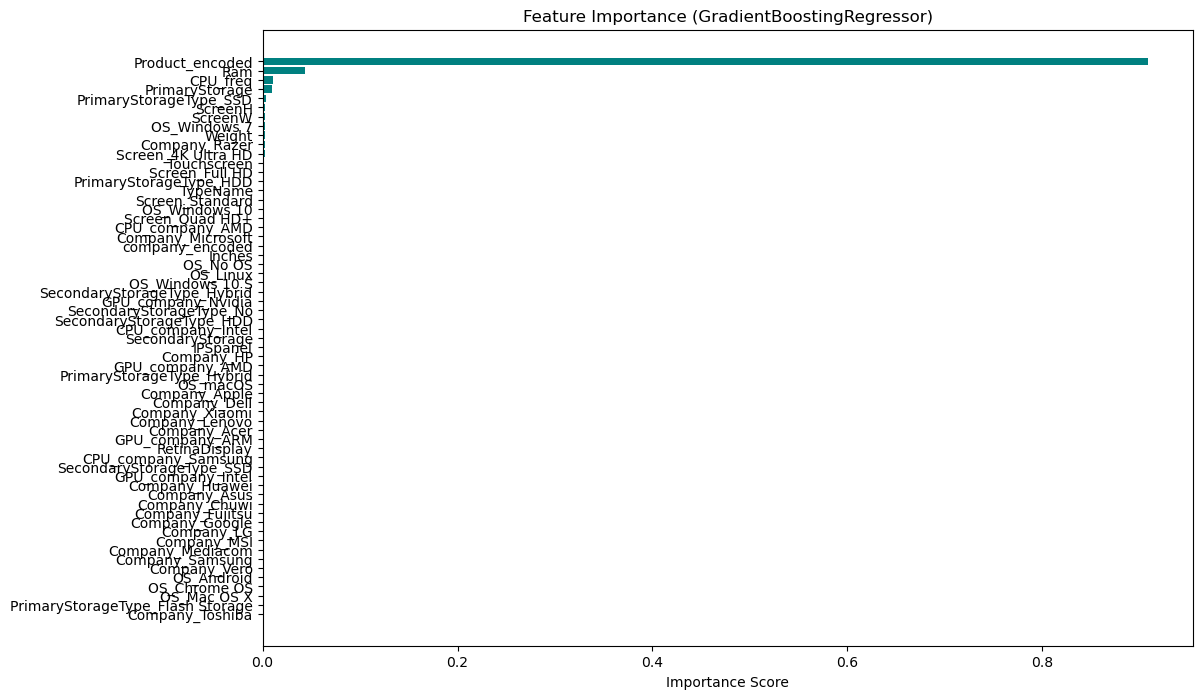

In [12]:
plt.figure(figsize=(12, 8))
# sorts the features by importance in descending order
sorted_idx = np.argsort(importances)[::-1]
# Create a horizontal bar chart of the sorted features and their scores
plt.barh(X.columns[sorted_idx], importances[sorted_idx], color='teal')
# let the most important feature appear ontop
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature Importance (GradientBoostingRegressor)")
plt.show()

### Hyperparameter Tuning
Our goal is to improve the RMSE score. Therefore, we would carry out hyperparameter tuning to improve the performance of the model

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [100, 200, 300],
             "learning_rate": [0.01, 0.05, 0.1],
             "max_depth": [3, 4, 5],
             "min_samples_split": [2, 5, 10],
             "min_samples_leaf": [1, 2, 4],
             "subsample": [0.8, 1.0]}

In [19]:
grid_search = GridSearchCV(estimator=GBR_model,
                          param_grid=param_grid,
                          cv=5, scoring="neg_root_mean_squared_error",
                          verbose=2, n_jobs=-1)
grid_search.fit(X, Y)
Best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}


In [23]:
best_model = GradientBoostingRegressor(**grid_search.best_params_, random_state=42)
best_model.fit(X, Y)

GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=4,
                          n_estimators=300, random_state=42, subsample=0.8)

In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error 

# Create a cross-validator and shuffle for fairness
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# define RMSE SCORER, the lower the score, the better the model
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# runs the model for each fold and records the RMSE for each run
scores = cross_val_score(best_model, X, Y, cv=kf, scoring=rmse_scorer)
model_score = (abs(np.mean(scores)))
print(f"Test RMSE: {model_score:.2f}")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the func

Test RMSE: 175.35


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
# Save the model
from joblib import dump, load
# Save your hyperparameter tuned model
dump(best_model, "gbr_model.joblib")

['gbr_model.joblib']

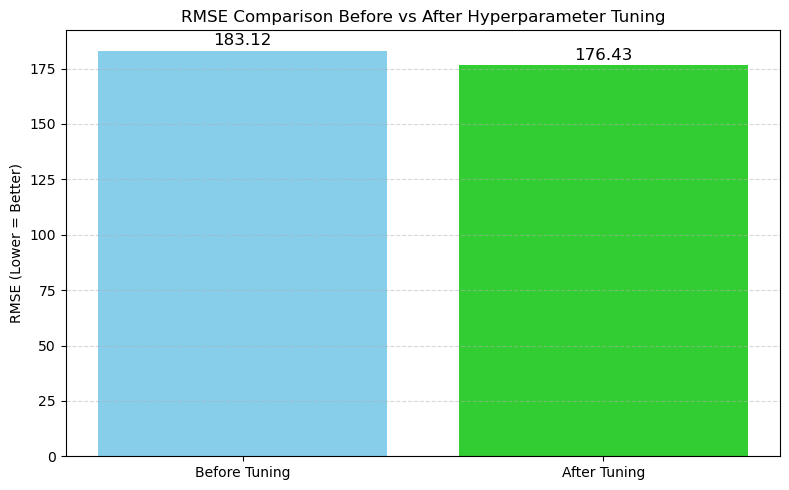

In [26]:
import matplotlib.pyplot as plt

# RMSE values before and after tuning
before_tuning = 183.12  # Gradient Boost before tuning
after_tuning = 176.43   # Best RMSE from GridSearchCV

fig, ax = plt.subplots(figsize=(8, 5))

# Bar chart comparison
bars = ax.bar(["Before Tuning", "After Tuning"], 
              [before_tuning, after_tuning],
              color=["skyblue", "limegreen"])

# Add RMSE values on top
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, 
            f"{height:.2f}", ha='center', va='bottom', fontsize=12)

ax.set_title("RMSE Comparison Before vs After Hyperparameter Tuning")
ax.set_ylabel("RMSE (Lower = Better)")
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

#### The model improved after hyperparameter tuning